The Excel file called `population.xlsx` has information about the countries in the world in a certain year. We first read it into our codebase as `countries_df`:

In [23]:
import pandas as pd
countries_df = pd.read_excel('population.xlsx')
countries_df.head() #show 15 first rows in the Excel sheet

,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
0,Afghanistan,ASIA (EX. NEAR EAST),31056997,647500,48.0,0.00,23.06,163.07,700.0,36.0,3.2,12.13,0.22,87.65,1.0,46.60,20.34,0.38,0.24,0.38
1,Albania,EASTERN EUROPE,3581655,28748,124.6,1.26,-4.93,21.52,4500.0,86.5,71.2,21.09,4.42,74.49,3.0,15.11,5.22,232.00,188.00,579.00
2,Algeria,NORTHERN AFRICA,32930091,2381740,13.8,0.04,-0.39,31.00,6000.0,70.0,78.1,3.22,0.25,96.53,1.0,17.14,4.61,101.00,0.60,298.00
3,American Samoa,OCEANIA,57794,199,290.4,58.29,-20.71,9.27,8000.0,97.0,259.5,10.00,15.00,75.00,2.0,22.46,3.27,NaN,NaN,NaN
4,Andorra,WESTERN EUROPE,71201,468,152.1,0.00,6.60,4.05,19000.0,100.0,497.2,2.22,0.00,97.78,3.0,8.71,6.25,NaN,NaN,NaN


Suppose we want to study the birth and death rate of countries which have GDP higher than 20000 dollars per capita. We first filter out the countries that match this condition from the data:

In [13]:
rich_ones = countries_df.loc[countries_df['GDP ($ per capita)']>20000]
rich_ones


,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
10,Aruba,LATIN AMER. & CARIB,71891,193,372.5,35.49,0.00,5.89,28000.0,97.0,516.1,10.53,0.00,89.47,2.0,11.03,6.68,4.00,333.00,663.00
11,Australia,OCEANIA,20264082,7686850,2.6,0.34,3.98,4.69,29000.0,100.0,565.5,6.55,0.04,93.41,1.0,12.14,7.51,38.00,262.00,0.70
12,Austria,WESTERN EUROPE,8192880,83870,97.7,0.00,2.00,4.66,30000.0,98.0,452.2,16.91,0.86,82.23,3.0,8.74,9.76,18.00,304.00,678.00
19,Belgium,WESTERN EUROPE,10379067,30528,340.0,0.22,1.23,4.68,29100.0,98.0,462.6,23.28,0.40,76.32,3.0,10.38,10.27,0.01,0.24,749.00
22,Bermuda,NORTHERN AMERICA,65773,53,1241.0,194.34,2.49,8.53,36000.0,98.0,851.4,20.00,0.00,80.00,2.0,11.40,7.74,0.01,0.10,0.89
36,Canada,NORTHERN AMERICA,33098932,9984670,3.3,2.02,5.96,4.75,29800.0,97.0,552.2,4.96,0.02,95.02,NaN,10.78,7.80,22.00,294.00,684.00
38,Cayman Islands,LATIN AMER. & CARIB,45436,262,173.4,61.07,18.75,8.19,35000.0,98.0,836.3,3.85,0.00,96.15,2.0,12.74,4.89,14.00,32.00,954.00
54,Denmark,WESTERN EUROPE,5450661,43094,126.5,16.97,2.48,4.56,31100.0,100.0,614.6,54.02,0.19,45.79,3.0,11.13,10.36,18.00,246.00,735.00
66,Faroe Islands,WESTERN EUROPE,47246,1399,33.8,79.84,1.41,6.24,22000.0,NaN,503.8,2.14,0.00,97.86,NaN,14.05,8.70,0.27,0.11,0.62
68,Finland,WESTERN EUROPE,5231372,338145,15.5,0.37,0.95,3.57,27400.0,100.0,405.3,7.19,0.03,92.78,3.0,10.45,9.86,28.00,295.00,676.00


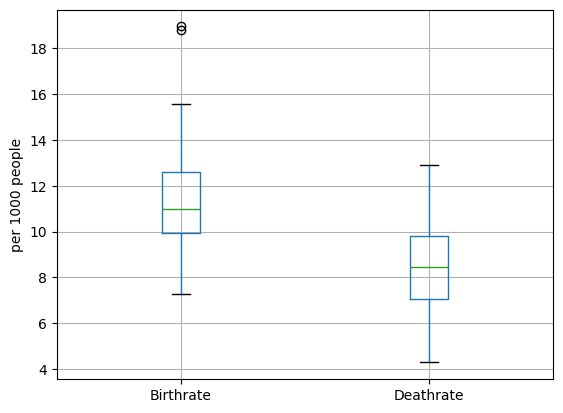

In [24]:
from matplotlib import pyplot as plt
%matplotlib inline

rich_ones.boxplot(column=['Birthrate', 'Deathrate'], 
                  ylabel='per 1000 people')
plt.show()

Visualize population of 15 highly populated countries:

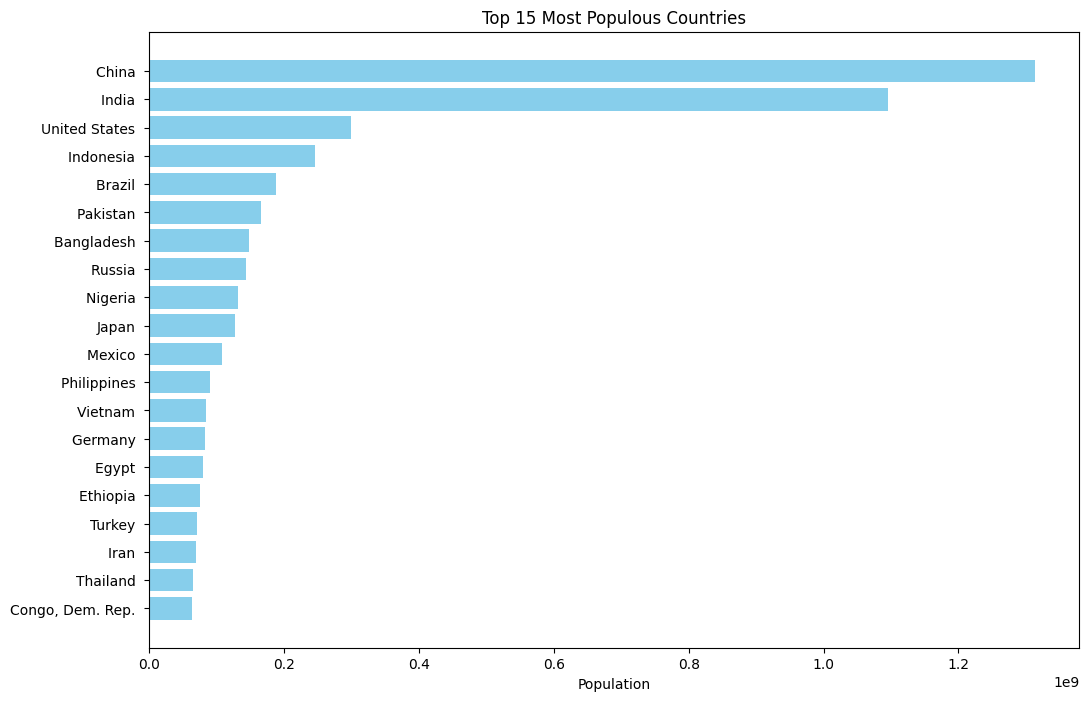

In [20]:
top_countries = countries_df.nlargest(15, 'Population')[['Country', 'Population']]

# Plot the data
plt.figure(figsize=(12, 8))
plt.barh(top_countries['Country'], top_countries['Population'], color='skyblue')
plt.xlabel('Population')
plt.title('Top 15 Most Populous Countries')
plt.gca().invert_yaxis()  # Invert y-axis for better readability
plt.show()

Make a wordcloud with the names of 50 most populous countries, the size of the name should correspond with the population

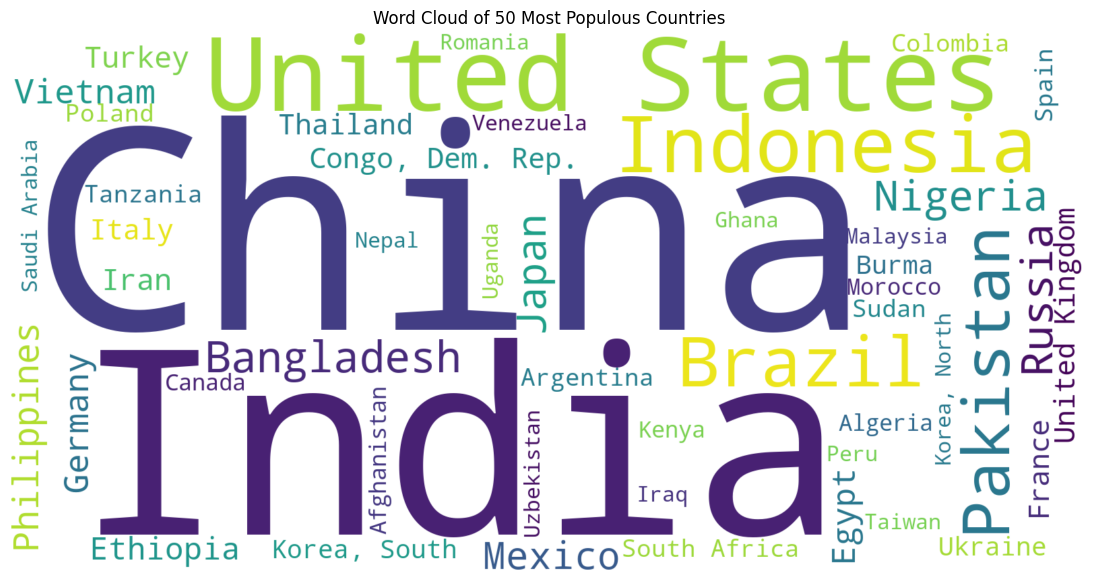

In [22]:
from wordcloud import WordCloud
top_50_countries = countries_df.nlargest(50, 'Population')[['Country', 'Population']]


country_population_dict = dict(zip(top_50_countries['Country'], top_50_countries['Population']))

wordcloud = WordCloud(width=800, height=400, background_color='white', 
                      colormap='viridis', scale=2).generate_from_frequencies(country_population_dict)

# Plot the word cloud
plt.figure(figsize=(14, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of 50 Most Populous Countries')
plt.show()